## Problem 2: CART-RF-ANN
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

## Attribute Information:¶
Target: Claim Status (Claimed)

Code of tour firm (Agency_Code)

Type of tour insurance firms (Type)

Distribution channel of tour insurance agencies (Channel)

Name of the tour insurance products (Product)

Duration of the tour (Duration)

Destination of the tour (Destination)

Amount of sales of tour insurance policies (Sales)

The commission received for tour insurance firm (Commission)


Age of insured (Age)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("insurance_part2_data.csv")

In [5]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it

### Checking the data

In [4]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
df.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [6]:
df.shape

(3000, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


### observation
10 variables

Age, Commision, Duration, Sales are numeric variable

rest are categorial variables

3000 records, no missing one

9 independant variable and one target variable - Clamied

## Check for missing value in any column

In [8]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

## Descriptive Statistics Summary¶

In [179]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precision,5.0,0.748141,0.048712,0.671498,0.736182,0.761049,0.771111,0.800866
recall,5.0,0.726241,0.143518,0.501805,0.696328,0.771111,0.771111,0.890851
f1-score,5.0,0.731705,0.100188,0.574380,0.708923,0.760647,0.771111,0.843465
support,5.0,540.154222,395.608922,0.771111,277.000000,623.000000,900.000000,900.000000


### Observation
- duration has negative valu, it is not possible. Wrong entry.
- Commision & Sales- mean and median varies signficantly
- Categorial code variable maximun unique count is 5

## Geting unique counts of all Nominal Variables

In [11]:
for i in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]:
    print(i.upper(),': ',df[i].nunique())
    print(df[i].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




## Check for duplicate data

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


### Univariate Analysis

#### Numerical variable

In [14]:
df.head(3)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas


In [15]:
list=['Age','Commision','Duration','Sales']

In [16]:
def univariate(column):
    
    print(column)
    
    fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(13,5))

    
    ## boxplot
    sns.boxplot(df[column],ax=axes[0])
    axes[0].set_ylabel(column,fontsize=15)
    axes[0].set_title(" distrubution" + " " + column)


    # distplot
    sns.distplot(df[column],ax=axes[1])
    axes[1].set_xlabel(column, fontsize=15)
    
    
    # histplot
    sns.histplot(df[column],ax=axes[2])
    axes[2].set_xlabel(column, fontsize=15)
    
    
    plt.tight_layout()
    plt.show()

Age


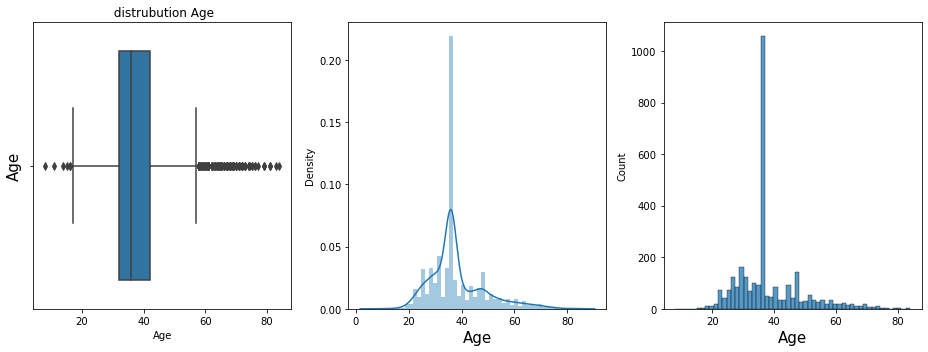

Commision


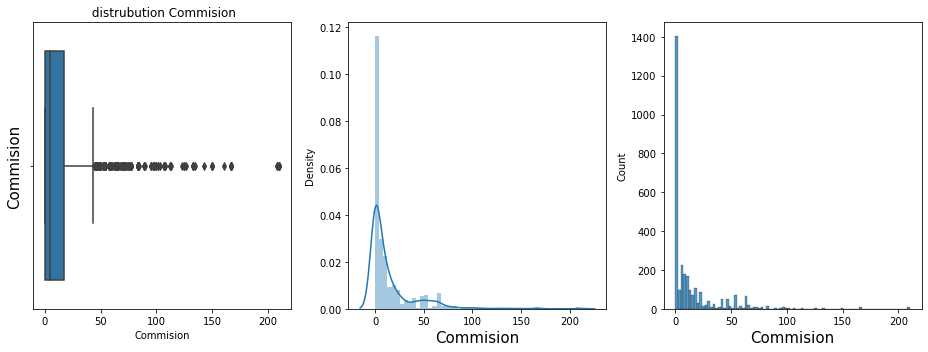

Duration


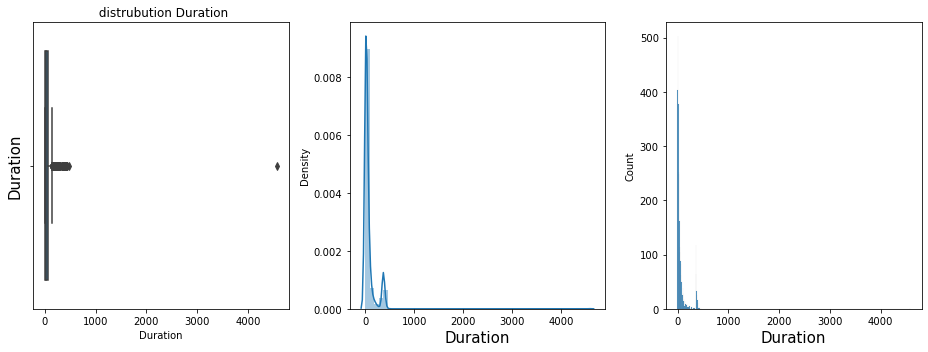

Sales


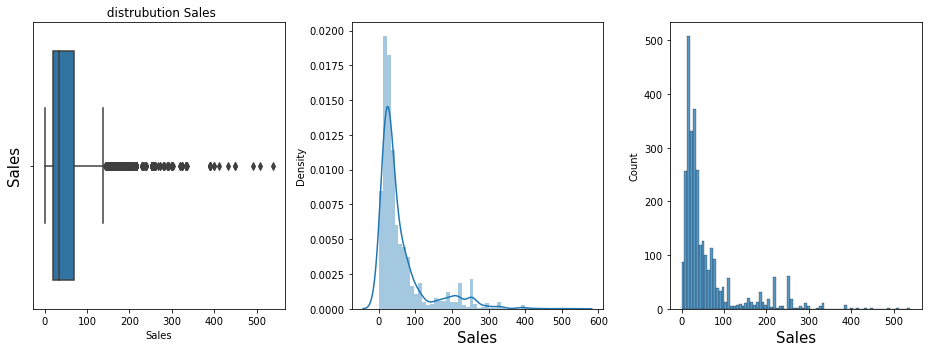

In [19]:
for i in list:
    univariate(i)
    

In [20]:
# lets cheeck the number of outliers
df1=df.copy()
def check_outliers(data):
    vData_num = data.loc[:,data.columns != 'class']
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    # checking for outliers, True represents outlier
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers(df)

No. of outliers in Age: 204
No. of outliers in Commision: 362
No. of outliers in Duration: 382
No. of outliers in Sales: 353


No of attributes with outliers are : 4


### Categorical Variables

### Agency_Code

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

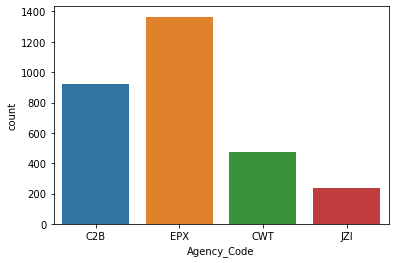

In [21]:
sns.countplot(data = df, x = 'Agency_Code')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

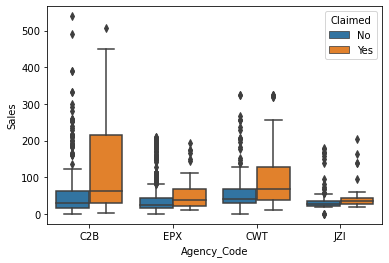

In [22]:
sns.boxplot(data = df, x='Agency_Code',y='Sales', hue='Claimed')

### Type

<AxesSubplot:xlabel='Type', ylabel='count'>

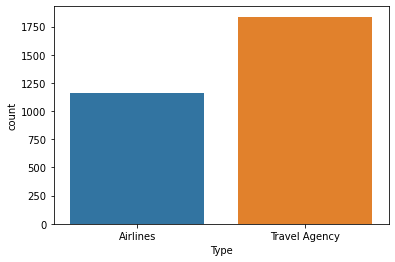

In [23]:
sns.countplot(data = df, x = 'Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

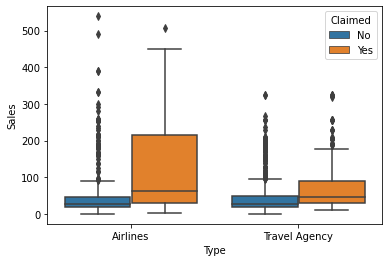

In [24]:
sns.boxplot(data = df, x='Type',y='Sales', hue='Claimed')

### Channel

<AxesSubplot:xlabel='Channel', ylabel='count'>

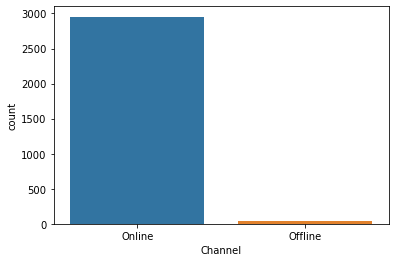

In [25]:
sns.countplot(data = df, x = 'Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

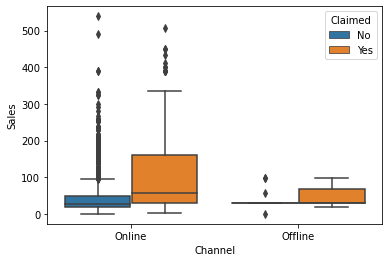

In [26]:
sns.boxplot(data = df, x='Channel',y='Sales', hue='Claimed')

### Product Name

<AxesSubplot:xlabel='Product Name', ylabel='count'>

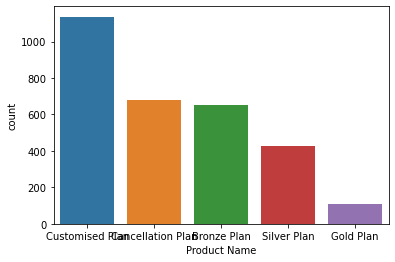

In [27]:
sns.countplot(data = df, x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

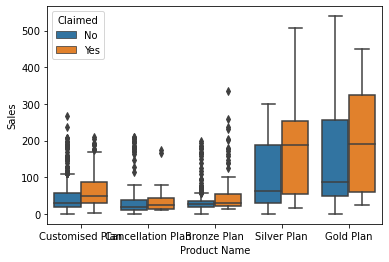

In [28]:
sns.boxplot(data = df, x='Product Name',y='Sales', hue='Claimed')

### Destination

<AxesSubplot:xlabel='Destination', ylabel='count'>

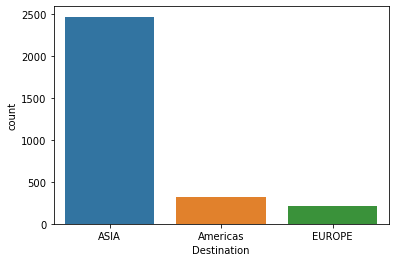

In [29]:
sns.countplot(data = df, x = 'Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

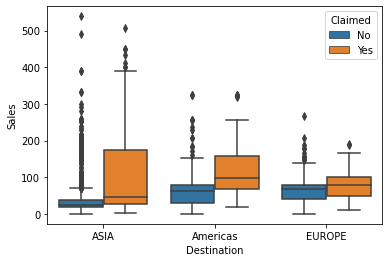

In [30]:
sns.boxplot(data = df, x='Destination',y='Sales', hue='Claimed')

### Multivariate analysis

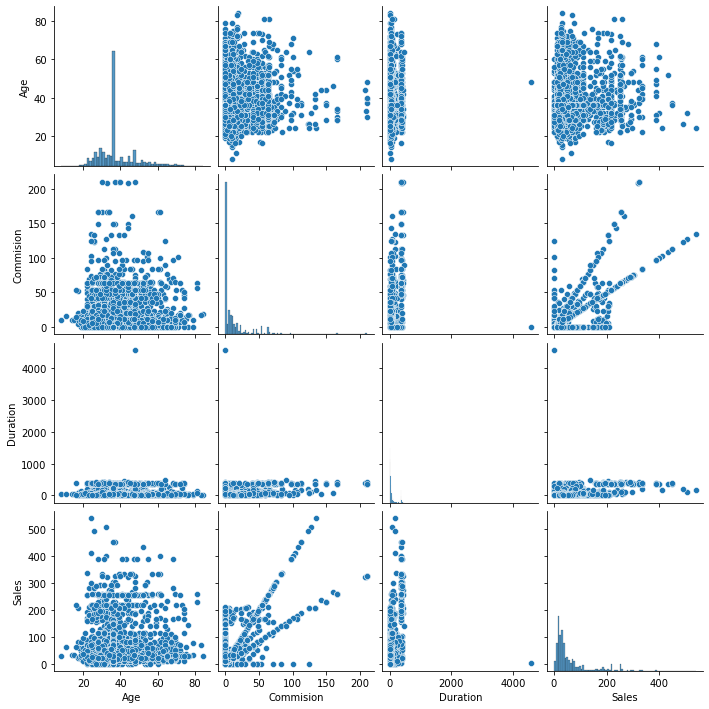

In [31]:
sns.pairplot(df[['Age', 'Commision', 
    'Duration', 'Sales']])

### Checking for Correlations

<AxesSubplot:>

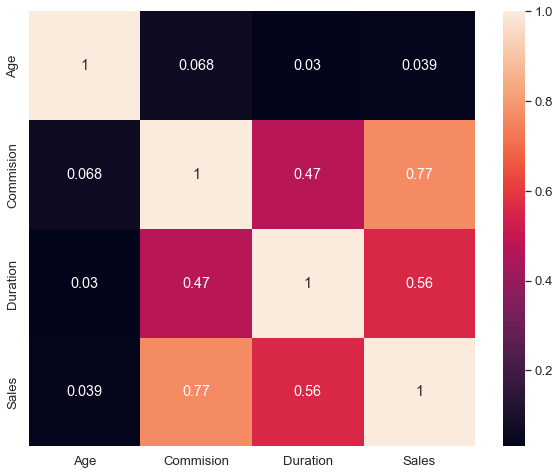

In [32]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['Age', 'Commision', 
    'Duration', 'Sales']].corr(), annot=True)

### # Converting all objects to categorical codes

In [6]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        df[feature] = pd.Categorical(df[feature]).codes
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


### Proportion of 1 and 0

In [4]:
df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [7]:
y=df['Claimed']
x=df.drop('Claimed',axis=1)
x

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0
...,...,...,...,...,...,...,...,...,...
2995,28,1,1,166.53,1,364,256.20,3,1
2996,35,0,0,13.50,1,5,54.00,3,0
2997,36,2,1,0.00,1,54,28.00,2,0
2998,34,0,0,7.64,1,39,30.55,0,0


In [7]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    0
2997    0
2998    1
2999    0
Name: Claimed, Length: 3000, dtype: int8

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=5)
X_train


,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
279,36,2,1,0.00,1,8,10.00,1,0
1678,36,2,1,0.00,1,11,44.00,2,0
34,25,2,1,0.00,0,20,37.00,2,1
2454,31,0,0,58.35,1,380,233.40,4,0
1747,36,2,1,0.00,1,5,182.00,1,0
...,...,...,...,...,...,...,...,...,...
2121,36,2,1,0.00,1,1,12.00,1,0
1424,47,1,1,17.82,1,18,29.70,2,0
1725,36,2,1,0.00,1,3,20.00,2,0
2254,49,0,0,97.34,1,364,389.35,3,0


In [12]:
X_test


,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
2899,36,2,1,0.00,1,17,62.0,2,0
2670,36,2,1,0.00,1,6,10.0,1,0
2774,36,2,1,0.00,1,10,31.0,1,0
1699,31,1,1,29.70,1,125,49.5,2,2
1933,54,3,0,6.30,1,23,18.0,0,0
...,...,...,...,...,...,...,...,...,...
982,34,0,0,16.75,1,15,67.0,0,0
1488,41,0,0,15.00,1,59,60.0,0,0
492,36,2,1,0.00,1,21,101.0,2,2
1492,26,2,1,0.00,1,65,10.0,1,0


In [10]:
print("shape of train dataset",X_train.shape)
print("*****************************************")
print("shape of test dataset",X_test.shape)

shape of train dataset (2100, 9)
*****************************************
shape of test dataset (900, 9)


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt_model=DecisionTreeClassifier(criterion='gini') 

In [30]:
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier()

In [9]:
from sklearn import tree
import os
train_char_label=['no','yes']
ld_Tree_File = open('Downloads\dt_tree17.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


### Finding the best parameter using best grid

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid={
    
    'criterion': ['gini'],
    'max_depth': [4,6,10,12],
    'min_samples_leaf': [40,60,80,120], 
    'min_samples_split': [450,150,300,250],
}
    

In [12]:
dt_model=DecisionTreeClassifier(random_state=1)

In [13]:
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid
                         ,cv=10)

In [14]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 6, 10, 12],
                         'min_samples_leaf': [40, 60, 80, 120],
                         'min_samples_split': [450, 150, 300, 250]})

In [17]:
from sklearn import tree
import os
train_char_label=['no','yes']
ld_Tree_File = open('Downloads\dt_tree19.dot','w')
dot_data = tree.export_graphviz(best_grid, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


In [15]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 80,
 'min_samples_split': 250}

In [16]:
best_grid=grid_search.best_estimator_

### Variable Importance

In [27]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.638253
Sales         0.215088
Product Name  0.087198
Commision     0.022747
Age           0.020070
Duration      0.016645
Type          0.000000
Channel       0.000000
Destination   0.000000


In [28]:
tree_char_label=['no','yes']
tree_regularized=open('Documents\claimed_tree_file.dot','w')
tree.export_graphviz(best_grid,out_file=tree_regularized,feature_names=list(X_train),class_names=tree_char_label)

### Predicting on Training and Test dataset

In [58]:
ytrain_predict_dtcl = best_grid.predict(X_train)
ytest_predict_dtcl = best_grid.predict(X_test)

In [64]:
ytest_predict_dtcl

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

### Getting the Predicted Classes and Probs

In [65]:
ytest_predict_prob_dtcl=best_grid.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.697947,0.302053
1,0.979452,0.020548
2,0.920930,0.079070
3,0.510417,0.489583
4,0.920930,0.079070


### Building a Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfcl=RandomForestClassifier() 

In [25]:
param_grid_rfcl ={
    'n_estimators':[300,350],
    'max_features':[6,7],
    'max_depth':[4,5],
    'min_samples_split':[200,250],
    'min_samples_leaf':[120,150]
}

In [36]:
grid_search_rfcl=GridSearchCV(estimator=rfcl,param_grid=param_grid_rfcl
                         ,cv=3,scoring="accuracy")

In [37]:
grid_search_rfcl.fit(X_train,train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5], 'max_features': [6, 7],
                         'min_samples_leaf': [120, 150],
                         'min_samples_split': [200, 250],
                         'n_estimators': [300, 350]},
             scoring='accuracy')

In [38]:
grid_search_rfcl.best_params_


{'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 120,
 'min_samples_split': 200,
 'n_estimators': 350}

In [42]:
grid_search_rfcl.best_score_

0.771904761904762

In [39]:
 grid_search_reg_rfcl=grid_search_rfcl.best_estimator_
    


### VARIABLE IMPORTANCE

In [61]:
print (pd.DataFrame(grid_search_reg_rfcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.508047
Product Name  0.242081
Sales         0.124344
Commision     0.076646
Type          0.022722
Duration      0.020470
Age           0.003141
Destination   0.002549
Channel       0.000000


### Predicting on Training and Test dataset

In [62]:
ytrain_predict_rfcl = grid_search_rfcl.predict(X_train)
ytest_predict_rfcl = grid_search_rfcl.predict(X_test)

In [63]:
ytest_predict_prob_rfcl=grid_search_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.754145,0.245855
1,0.964506,0.035494
2,0.903879,0.096121
3,0.644419,0.355581
4,0.893384,0.106616


# Building a Neural Network Classifier

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc=StandardScaler()

In [66]:
X_train_scaled=sc.fit_transform(X_train)

In [67]:
X_train_scaled

array([[-0.18994338,  0.70248843,  0.7955944 , ..., -0.70442952,
        -0.5190369 , -0.43844767],
       [-0.18994338,  0.70248843,  0.7955944 , ..., -0.22528685,
         0.27425094, -0.43844767],
       [-1.23687541,  0.70248843,  0.7955944 , ..., -0.32393387,
         0.27425094,  1.28901968],
       ...,
       [-0.18994338,  0.70248843,  0.7955944 , ..., -0.5635052 ,
         0.27425094, -0.43844767],
       [ 1.04733993, -1.31147158, -1.25692187, ...,  4.64153441,
         1.06753879, -0.43844767],
       [ 0.95216429, -1.31147158, -1.25692187, ..., -0.70386582,
         0.27425094, -0.43844767]])

In [68]:
X_test_scaled=sc.transform(X_test)

In [116]:
X_test_scaled

array([[-0.18994338,  0.70248843,  0.7955944 , ...,  0.02837692,
         0.27425094, -0.43844767],
       [-0.18994338,  0.70248843,  0.7955944 , ..., -0.70442952,
        -0.5190369 , -0.43844767],
       [-0.18994338,  0.70248843,  0.7955944 , ..., -0.40848846,
        -0.5190369 , -0.43844767],
       ...,
       [-0.18994338,  0.70248843,  0.7955944 , ...,  0.57798176,
         0.27425094,  3.01648703],
       [-1.14169978,  0.70248843,  0.7955944 , ..., -0.70442952,
        -0.5190369 , -0.43844767],
       [ 1.52321812, -1.31147158, -1.25692187, ..., -0.61987493,
        -1.31232475, -0.43844767]])

In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
param_grid_nncl = {
    'hidden_layer_sizes': [100,200,500], 
    'max_iter': [2500,3000,7000], 
    'solver': ['adam'], 
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [71]:
grid_search_nncl.fit(X_train_scaled, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

# Predicting the Training and Testing data

In [72]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train_scaled)
ytest_predict_nncl = best_grid_nncl.predict(X_test_scaled)

# Getting the Predicted Classes and Probs

In [75]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.000301,0.999699
1,0.927517,0.072483
2,0.013312,0.986688
3,0.993360,0.006640
4,0.964675,0.035325


# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

# CART - AUC and ROC for the training data

In [44]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

AUC: 0.821


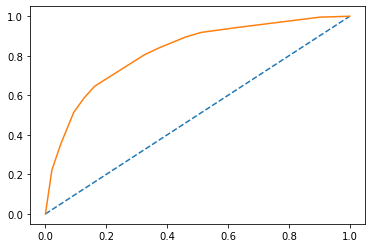

In [99]:
# predict probabilities
probs_cart = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

# CART -AUC and ROC for the test data

AUC: 0.797


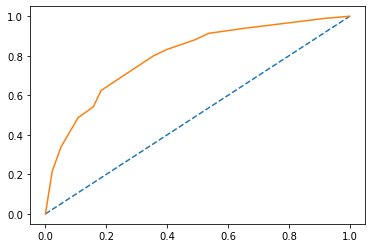

In [100]:
# predict probabilities
probs_cart = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

# CART Confusion Matrix and Classification Report for the training data

In [71]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1318,  135],
       [ 315,  332]], dtype=int64)

In [97]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7857142857142857

In [96]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1453
           1       0.71      0.51      0.60       647

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.73      2100
weighted avg       0.78      0.79      0.77      2100



In [95]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.71
cart_train_recall  0.51
cart_train_f1  0.6


# CART Confusion Matrix and Classification Report for the testing data

In [102]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[556,  67],
       [142, 135]], dtype=int64)

In [103]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7677777777777778

In [104]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7677777777777778

In [105]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.49      0.56       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.70       900
weighted avg       0.76      0.77      0.76       900



In [106]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.67
cart_test_recall  0.49
cart_test_f1  0.56


# Cart Conclusion

### Train Data:
    - AUC: 82%
    - Accuracy: 79%
    - Precision: 70%
    - f1-Score: 60%

### Test Data:
    - AUC: 80%
    - Accuracy: 77%
    - Precision: 80%
    - f1-Score: 84%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Change is the most important variable for predicting diabetes

# RF Model Performance Evaluation on Training data

In [107]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1327,  126],
       [ 355,  292]], dtype=int64)

In [108]:
rf_train_acc=grid_search_rfcl.score(X_train,train_labels) 
rf_train_acc

0.770952380952381

In [109]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1453
           1       0.70      0.45      0.55       647

    accuracy                           0.77      2100
   macro avg       0.74      0.68      0.70      2100
weighted avg       0.76      0.77      0.75      2100



In [110]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.7
rf_train_recall  0.45
rf_train_f1  0.55


Area under Curve is 0.821326339684137


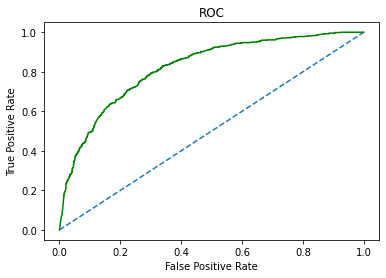

In [111]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,grid_search_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,grid_search_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

# RF Model Performance Evaluation on Test data

In [112]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[564,  59],
       [152, 125]], dtype=int64)

In [113]:
rf_test_acc=grid_search_rfcl.score(X_test,test_labels)
rf_test_acc

0.7655555555555555

In [114]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       623
           1       0.68      0.45      0.54       277

    accuracy                           0.77       900
   macro avg       0.73      0.68      0.69       900
weighted avg       0.75      0.77      0.75       900



In [81]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.45
rf_test_f1  0.54


Area under Curve is 0.806612930330125


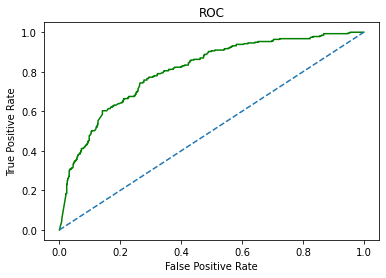

In [115]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,grid_search_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,grid_search_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

# Random Forest Conclusion


### Train Data:
    - AUC: 86%
    - Accuracy: 80%
    - Precision: 72%
    - f1-Score: 66%

### Test Data:
    - AUC: 82%
    - Accuracy: 78%
    - Precision: 68%
    - f1-Score: 62

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Change is again the most important variable for predicting diabetes

# NN Model Performance Evaluation on Training data

In [117]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1296,  157],
       [ 314,  333]], dtype=int64)

In [118]:
nn_train_acc=best_grid_nncl.score(X_train_scaled,train_labels) 
nn_train_acc

0.7757142857142857

In [119]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [120]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.68
nn_train_recall  0.51
nn_train_f1  0.59


Area under Curve is 0.8165427602221487


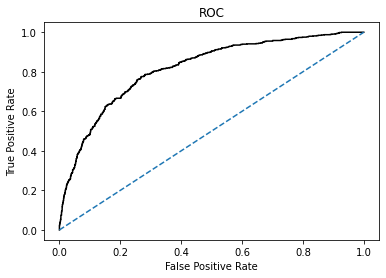

In [121]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_train_scaled)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train_scaled)[:,1])
print('Area under Curve is', nn_train_auc)

# NN Model Performance Evaluation on Test data

In [122]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[553,  70],
       [138, 139]], dtype=int64)

In [123]:
nn_test_acc=best_grid_nncl.score(X_test_scaled,test_labels)
nn_test_acc

0.7688888888888888

In [124]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



In [125]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.5
nn_test_f1  0.57


Area under Curve is 0.8044051433902567


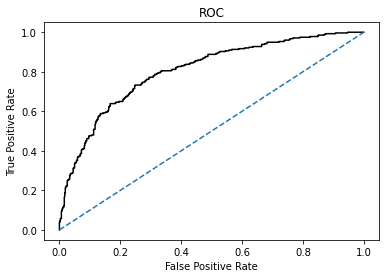

In [126]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(X_test_scaled)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_test_scaled)[:,1])
print('Area under Curve is', nn_test_auc)

# Neural Network Conclusion


### Train Data:
    - AUC: 82%
    - Accuracy: 78%
    - Precision: 68%
    - f1-Score: 59

### Test Data:
    - AUC: 80%
    - Accuracy: 77%
    - Precision: 67%
    - f1-Score: 57%

Training and Test set results are almost similar, and with the overall measures high, the model is a

# 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

# Comparison of the performance metrics from the 3 models

In [127]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.77,0.77,0.78,0.77
AUC,0.82,0.80,0.82,0.81,0.82,0.80
Recall,0.51,0.49,0.45,0.45,0.51,0.50
Precision,0.71,0.67,0.70,0.68,0.68,0.67
F1 Score,0.60,0.56,0.55,0.54,0.59,0.57


# ROC Curve for the 3 models on the Training data

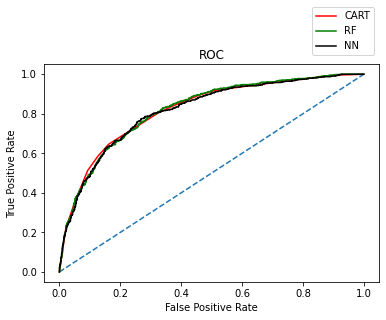

In [128]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for the 3 models on the Test data

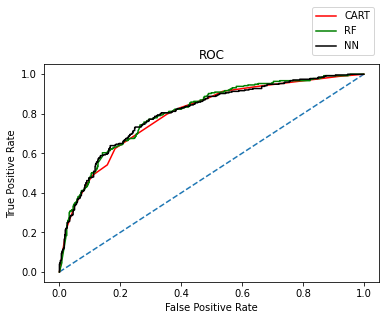

In [129]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')